In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
path = "/drive/My Drive/Orbit/NLP/review.csv"
df = pd.read_csv(path)

#Preprocessing

In [4]:
df.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [5]:
df = df.iloc[:, [3,6]]
df

,rating,reviewContent
0,5,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto"
2,5,okkkkk mantaaaaaaapppp ... goood
3,4,bagus sesuai
4,5,NaN
...,...,...
203782,5,barang bagus dengan harga kompetitif
203783,3,NaN
203784,5,NaN
203785,3,Ok.thank lazada Pagi order sore barang nyampe ...


In [6]:
df.isnull()

,rating,reviewContent
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True
...,...,...
203782,False,False
203783,False,True
203784,False,True
203785,False,False


In [7]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
df

,rating,reviewContent
0,5,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto"
2,5,okkkkk mantaaaaaaapppp ... goood
3,4,bagus sesuai
4,1,bima
...,...,...
107024,5,Wkwkwk
107025,1,seller incapable to keep his product page clea...
107026,5,barang bagus dengan harga kompetitif
107027,3,Ok.thank lazada Pagi order sore barang nyampe ...


In [9]:
df.drop_duplicates(subset ="reviewContent", keep = False, inplace = True)
df.reset_index(drop=True, inplace=True)
df

,rating,reviewContent
0,5,"Kapasitas HDD asli 1 TB, dan tanpa ada lecet d..."
1,4,"HD diterima dg packing bubble bagus, hanya tid..."
2,5,"Saya sangat puas dengan barang.nya, kualitas b..."
3,4,Barang diterima dengan kondisi yang baik tapi ...
4,5,"Suka banget sama barangnya packing nya rapi, p..."
...,...,...
8154,5,"packagingnya bagus, hardisknya bagus, bonusnya..."
8155,5,"Hardisk diterima dalam keadaan baik, packaging..."
8156,5,puas dengan barangnya! :)
8157,5,"mantapp,, terima kasih lazadaaa,, tv coocaa 40..."


In [10]:
df = df.rename(columns={"reviewContent":"teks", "rating":"label"})
df

,label,teks
0,5,"Kapasitas HDD asli 1 TB, dan tanpa ada lecet d..."
1,4,"HD diterima dg packing bubble bagus, hanya tid..."
2,5,"Saya sangat puas dengan barang.nya, kualitas b..."
3,4,Barang diterima dengan kondisi yang baik tapi ...
4,5,"Suka banget sama barangnya packing nya rapi, p..."
...,...,...
8154,5,"packagingnya bagus, hardisknya bagus, bonusnya..."
8155,5,"Hardisk diterima dalam keadaan baik, packaging..."
8156,5,puas dengan barangnya! :)
8157,5,"mantapp,, terima kasih lazadaaa,, tv coocaa 40..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


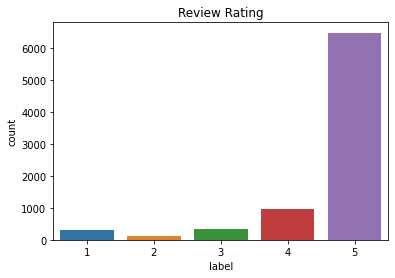

In [11]:
plt.title('Review Rating')
sns.countplot(df.label)
#tidak seimbang

In [12]:
print('Rating 1 sebanyak: ' + str(df[df.label == 1].shape[0]))
print('Rating 2 sebanyak: ' + str(df[df.label == 2].shape[0]))
print('Rating 3 sebanyak: ' + str(df[df.label == 3].shape[0]))
print('Rating 4 sebanyak: ' + str(df[df.label == 4].shape[0]))
print('Rating 5 sebanyak: ' + str(df[df.label == 5].shape[0]))

Rating 1 sebanyak: 291
Rating 2 sebanyak: 106
Rating 3 sebanyak: 322
Rating 4 sebanyak: 972
Rating 5 sebanyak: 6468


In [13]:
df.iloc[2]

label                                                    5
teks     Saya sangat puas dengan barang.nya, kualitas b...
Name: 2, dtype: object

menghapus beberapa teks berlabel 4 & 5, agar data terdistribusi dengan baik

In [14]:
noterase1 = df[df['label'] == 1]
noterase2 = df[df['label'] == 2]
noterase3 = df[df['label'] == 3]
noterasedf  = [noterase1, noterase2, noterase3]
noterase = pd.concat(noterasedf)
noterase

,label,teks
24,1,barang belum terima....pihak lazada bilang sid...
59,1,"2bulan pake crashed, pdhl ga prnah jatoh"
64,1,"Ini cuman My Passport biasa, bukan My Passport..."
81,1,Udah hampir 2 minggu barang belum jg nyampe.or...
83,1,"Mohon bantuan nya, kok barangnya belom sampai ..."
...,...,...
8053,3,Bagus..ok punya semoga awet
8090,3,Knapa pesanan saya belum ada smpai skrang pdah...
8132,3,Alhamdulilah...pengiriman pesanan sudah sampai...
8146,3,barang udah nyampe dgn selamat tapi waktu pngi...


In [15]:
lima = df[df['label'] == 5]
lima = lima.iloc[:300]
lima

,label,teks
0,5,"Kapasitas HDD asli 1 TB, dan tanpa ada lecet d..."
2,5,"Saya sangat puas dengan barang.nya, kualitas b..."
4,5,"Suka banget sama barangnya packing nya rapi, p..."
5,5,"hardisknya keren, pelindungnya kokoh , udah ad..."
7,5,"Trims Lazada & reseller, , barang sdh saya ter..."
...,...,...
448,5,"Barang bgus,sipp dech"
449,5,pengiriman cepat dan barang pun bagus
451,5,sukaaaa
452,5,Alhamdulillah barangnya bagus dan cepat sampai...


In [16]:
empat = df[df['label'] == 4]
empat = empat.iloc[:350]
empat

,label,teks
1,4,"HD diterima dg packing bubble bagus, hanya tid..."
3,4,Barang diterima dengan kondisi yang baik tapi ...
6,4,"Sampainya agak lama tapi puas, packing rapi da..."
20,4,dikirim hari berikutnya dan barang mulus
30,4,"thanks, respon cepat Hdd Ext 2TB sampai sesuai..."
...,...,...
2189,4,barang dtng dengan paking yg baik..blm digunak...
2197,4,Bagus dan pengiriman cepat
2198,4,agak susah buka kesingnya
2206,4,Barang bagus pelayanan cepat namun saat di ter...


In [17]:
combinedf  = [noterase, empat, lima]
combine = pd.concat(combinedf)
combine

,label,teks
24,1,barang belum terima....pihak lazada bilang sid...
59,1,"2bulan pake crashed, pdhl ga prnah jatoh"
64,1,"Ini cuman My Passport biasa, bukan My Passport..."
81,1,Udah hampir 2 minggu barang belum jg nyampe.or...
83,1,"Mohon bantuan nya, kok barangnya belom sampai ..."
...,...,...
448,5,"Barang bgus,sipp dech"
449,5,pengiriman cepat dan barang pun bagus
451,5,sukaaaa
452,5,Alhamdulillah barangnya bagus dan cepat sampai...


In [18]:
df.reset_index(drop=True, inplace=True)
df

,label,teks
0,5,"Kapasitas HDD asli 1 TB, dan tanpa ada lecet d..."
1,4,"HD diterima dg packing bubble bagus, hanya tid..."
2,5,"Saya sangat puas dengan barang.nya, kualitas b..."
3,4,Barang diterima dengan kondisi yang baik tapi ...
4,5,"Suka banget sama barangnya packing nya rapi, p..."
...,...,...
8154,5,"packagingnya bagus, hardisknya bagus, bonusnya..."
8155,5,"Hardisk diterima dalam keadaan baik, packaging..."
8156,5,puas dengan barangnya! :)
8157,5,"mantapp,, terima kasih lazadaaa,, tv coocaa 40..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


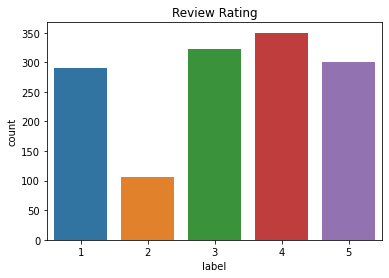

In [19]:
plt.title('Review Rating')
sns.countplot(combine.label)

In [20]:
print('Rating 1 sebanyak: ' + str(combine[combine.label == 1].shape[0]))
print('Rating 2 sebanyak: ' + str(combine[combine.label == 2].shape[0]))
print('Rating 3 sebanyak: ' + str(combine[combine.label == 3].shape[0]))
print('Rating 4 sebanyak: ' + str(combine[combine.label == 4].shape[0]))
print('Rating 5 sebanyak: ' + str(combine[combine.label == 5].shape[0]))

Rating 1 sebanyak: 291
Rating 2 sebanyak: 106
Rating 3 sebanyak: 322
Rating 4 sebanyak: 350
Rating 5 sebanyak: 300


#Preprocessing Data Teks

In [21]:
!pip install sastrawi

     |████████████████████████████████| 209 kB 5.3 MB/s 


In [22]:
import re
import nltk

In [23]:
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = re.sub(r' +', ' ', text)                   # white space
  text = text.strip()
  return text

In [24]:
combine['teks'].iloc[0]

'barang belum terima....pihak lazada bilang sidah diterima. cek di JNE lhoksukon aceh utara barang tidak ada...ada masalah, petigasnya tdk ramah, dan tdk ada solusk. mana yg benar. email ke CS JNE sama CS Lazada tdk ada reapon. bagaimana nasih barang saya harga 1 jt an'

In [25]:
tes = combine['teks'].iloc[0]
tes = casefolding(tes)

In [26]:
tes

'barang belum terimapihak lazada bilang sidah diterima cek di jne lhoksukon aceh utara barang tidak adaada masalah petigasnya tdk ramah dan tdk ada solusk mana yg benar email ke cs jne sama cs lazada tdk ada reapon bagaimana nasih barang saya harga jt an'

In [27]:
from nltk.corpus import stopwords

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
stopwords_ind = stopwords.words('indonesian')
len(stopwords_ind)

758

In [30]:
#menambahkan stopwords dari NLTK
tambahan_stopwords = ['rb', 'gb', 'tsel', 'kb', 'tb', 'hdd', 'tv', 'cooca', 'hardisk', 'aa']
stopwords_ind = stopwords_ind + tambahan_stopwords

In [31]:
#stopword
def remove_stopword(teks) :
  clean_teks = []
  teks = teks.split()
  for i in teks :
    if i not in stopwords_ind:
      clean_teks.append(i)
  return " ".join(clean_teks)

In [32]:
#stemming dan Lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer_factory = StemmerFactory()
ina_stemmer = stemmer_factory.create_stemmer()

In [33]:
def stemming(teks):
  teks = ina_stemmer.stem(teks)
  return teks

In [34]:
kamus_normalisasi = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')
def normalisasi(text):
  text = ' '.join([kamus_normalisasi[kamus_normalisasi['singkat'] == word]['hasil'].values[0] if (kamus_normalisasi['singkat'] == word).any() else word for word in text.split()])
  return text

In [35]:
kamus_normalisasi.head()

,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi


#PIPELINE NLP

In [36]:
def preprocessing(teks):
  teks = casefolding(teks)
  teks = remove_stopword(teks)
  teks = stemming(teks)
  teks = normalisasi(teks)
  return teks

In [37]:
%%time
combine['clean'] = combine['teks'].apply(preprocessing)

CPU times: user 4min 55s, sys: 1.56 s, total: 4min 57s
Wall time: 5min 7s


In [38]:
combine.iloc[30:45]

,label,teks,clean
226,1,Produk tidak disertai Kartu Garansi. Invoice t...,produk serta kartu garansi invoice produk garansi
247,1,Product yang kami terima tidak bekerja dan tid...,produk terima mohon ganti
269,1,Mohon bantuannya untuk HDD eksternal ini tidak...,mohon bantu eksternal do baca laptop macbook p...
293,1,gan...kenapa hard disk yg saya beli rusak ya?,gankenapa hard disk yang beli rusak ya
343,1,"Produk ok, tapi voucher yg tertera pd penawara...",produk ok voucher yang tera pd tawar expired
366,1,Barang bagus tp anti virusnya kok di ganti sti...,barang bagus tetapi anti virus ganti stiker
374,1,Saya tidak mendapatkan antivirus kaspersky yan...,antivirus kaspersky janji paket ganti gantung ...
419,1,Saya pesan tgl 3 Jun dan lsg byr dgn metode ki...,pesan tanggal jun lsg bayar dengan metode kiri...
420,1,Kalau HDD-nya emang 4TB?,hddnya emang
426,1,"Masa 3 Go Jek sdh kesana tutup terus tokonya, ...",go jek sudah kesana tutup toko order tanggal m...


In [39]:
combine.isnull().sum()

label    0
teks     0
clean    0
dtype: int64

In [40]:
combine.to_csv('dataclean.csv')

Text Featurization and Extraction

In [41]:
df = pd.read_csv('dataclean.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1369 non-null   int64 
 1   label       1369 non-null   int64 
 2   teks        1369 non-null   object
 3   clean       1367 non-null   object
dtypes: int64(2), object(2)
memory usage: 42.9+ KB


In [43]:
df.isnull().sum()

Unnamed: 0    0
label         0
teks          0
clean         2
dtype: int64

In [44]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [45]:
df.isnull().sum()

Unnamed: 0    0
label         0
teks          0
clean         0
dtype: int64

In [46]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [47]:
X = df.clean
y = df.label

In [48]:
# Unigram --> 1 kata
vec_uni = CountVectorizer(ngram_range=(1,1))
vec_uni.fit(X)
print(vec_uni.get_feature_names_out())

['ababila' 'abal' 'abkir' ... 'yey' 'yk' 'zippernya']


In [49]:
# Bigram --> 2 kata
vec_Bi = CountVectorizer(ngram_range=(2,2))
vec_Bi.fit(X)
print(vec_Bi.get_feature_names_out())

['ababila hanphone' 'abal data' 'abkir yang' ... 'yey trims' 'yk ukuranx'
 'zippernya kecewa']


In [50]:
#ubah dalam bentuk array
X_unigram = vec_uni.transform(X).toarray()

X_unigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
#ubah dalam bentuk array
X_Bigram = vec_Bi.transform(X).toarray()

X_Bigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle

In [52]:
import pickle

#save fitur BoW unigram
#with open('bow_unigram.pickle', 'wb') as output:
  #pickle.dump(X_unigram, output)

#transform BoW bigram
with open('bow_bigram.pickle', 'wb') as output:
  pickle.dump(X_Bigram, output)


In [53]:
#unigram
data_unigram = pd.DataFrame(X_unigram, columns=vec_uni.get_feature_names_out())
data_unigram

,ababila,abal,abkir,acara,aceh,activation,activationnyacode,actual,ada,adaada,...,yajangan,yak,yang,yapdhal,yaseller,yasudahlah,yet,yey,yk,zippernya
0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#Bigram
data_bigram = pd.DataFrame(X_Bigram, columns=vec_Bi.get_feature_names_out())
data_bigram

,ababila hanphone,abal data,abkir yang,acara yang,aceh utara,activation code,activationnyacode nyaa,actual ninja,ada bonus,ada mslhsmga,...,yang utama,yang warna,yang yang,yapdhal besok,yaseller model,yasudahlah sukses,yet hope,yey trims,yk ukuranx,zippernya kecewa
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Cek data sebelum preprocessing

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1367 non-null   int64 
 1   label       1367 non-null   int64 
 2   teks        1367 non-null   object
 3   clean       1367 non-null   object
dtypes: int64(2), object(2)
memory usage: 42.8+ KB


In [56]:
df.clean

0       barang terimapihak lazada bilang sidah terima ...
1                pakai crashed padahal tidak pernah jatuh
2       cuma my passport my passport ultra tulis deskr...
3       sudah minggu barang juga nyampeorder tanggal a...
4       mohon bantu nya barang bom sudah saya tunggu t...
                              ...                        
1362                                 barang bgussipp dech
1363                             kirim cepat barang bagus
1364                                              sukaaaa
1365    alhamdulillah barang bagus cepat warna sulit p...
1366          kirim barang cepat barang sesuai ekspektasi
Name: clean, Length: 1367, dtype: object

In [57]:
#Cek ada berapa banyak kata di dalam teks (data kotor)
pd.Series(' '.join(df.teks).split()).value_counts()

dan              447
barang           392
di               369
saya             274
sesuai           262
                ... 
cepat...cuman      1
dapatnya           1
dikit.             1
buds..             1
dirandom.          1
Length: 6020, dtype: int64

In [58]:
#Cek ada berapa banyak kata di dalam teks (data bersih)
pd.Series(' '.join(df.clean).split()).value_counts()

barang              796
tidak               384
kirim               337
sesuai              311
bagus               284
                   ... 
tekam                 1
ter                   1
transcendinfocom      1
keasliaan             1
dirandom              1
Length: 2600, dtype: int64

In [59]:
def frekuensi_kata(teks):
  kalimat = []
  for i in teks:
    kalimat.append(i)
  return ' '.join(kalimat)

In [60]:
corpus_clean = frekuensi_kata(df.clean)
corpus = frekuensi_kata(df.teks)

In [61]:
from wordcloud import WordCloud

In [62]:
frek_clean = WordCloud().process_text(corpus_clean)
frek = WordCloud().process_text(corpus)

In [63]:
def sort_dict_by_value(d, reverse = True):
  return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))

In [64]:
print(sort_dict_by_value(frek))

{'dan': 381, 'barang': 367, 'saya': 251, 'yg': 228, 'di': 225, 'nya': 217, 'yang': 187, 'tapi': 178, 'bagus': 169, 'ini': 161, 'pengiriman': 139, 'tidak': 134, 'untuk': 130, 'juga': 117, 'ada': 106, 'barangnya': 101, 'sampai': 85, 'dari': 82, 'cuma': 82, 'ga': 81, 'hdd': 80, 'produk': 79, 'cepat': 78, 'lazada': 77, 'ke': 75, 'ya': 75, 'gak': 72, 'beli': 70, 'ok': 66, 'kurang': 64, 'karena': 64, 'lama': 64, 'hardisk': 64, 'tp': 63, 'baik': 63, 'barang bagus': 63, 'sesuai dengan': 63, 'sudah': 62, 'Terima kasih': 62, 'bonus': 61, 'hari': 58, 'baru': 58, 'sangat': 57, 'Barang sudah': 57, 'lagi': 54, 'aman': 54, 'hanya': 53, 'mau': 53, 'oke': 53, 'seller': 52, 'dengan baik': 52, 'sama': 51, 'lumayan': 51, 'belum': 50, 'rusak': 49, 'aja': 48, 'lah': 48, 'buat': 48, 'thank': 48, 'pengiriman cepat': 48, 'kok': 47, 'bisa': 47, 'ternyata': 47, 'jadi': 47, 'tidak ada': 47, 'gan': 46, 'packing': 46, 'diterima': 45, 'harga': 45, 'banget': 45, 'tidak sesuai': 45, 'Barang sesuai': 45, 'udah': 44, 'm

#TF-IDF

In [65]:
#TF-IDF UNIGRAM

vec_tfidf_uni = TfidfVectorizer(ngram_range=(1,1))
vec_tfidf_uni.fit(X)

#ubah dalam bentuk array
X_unigram_tfidf = vec_tfidf_uni.transform(X).toarray()

#Unigram
data_unigram_tfidf = pd.DataFrame(X_unigram_tfidf, columns=vec_tfidf_uni.get_feature_names_out())
data_unigram_tfidf

,ababila,abal,abkir,acara,aceh,activation,activationnyacode,actual,ada,adaada,...,yajangan,yak,yang,yapdhal,yaseller,yasudahlah,yet,yey,yk,zippernya
0,0.0,0.0,0.0,0.0,0.211912,0.0,0.0,0.0,0.0,0.211912,...,0.0,0.0,0.085557,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1363,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1364,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1365,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
#TF-IDF BIGRAM

vec_tfidf_bi = TfidfVectorizer(ngram_range=(2,2))
vec_tfidf_bi.fit(X)

#ubah dalam bentuk array
X_bigram_tfidf = vec_tfidf_bi.transform(X).toarray()

#Bigram
data_bigram_tfidf = pd.DataFrame(X_bigram_tfidf, columns=vec_tfidf_bi.get_feature_names_out())
data_bigram_tfidf

,ababila hanphone,abal data,abkir yang,acara yang,aceh utara,activation code,activationnyacode nyaa,actual ninja,ada bonus,ada mslhsmga,...,yang utama,yang warna,yang yang,yapdhal besok,yaseller model,yasudahlah sukses,yet hope,yey trims,yk ukuranx,zippernya kecewa
0,0.0,0.0,0.0,0.0,0.183923,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1363,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1364,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1365,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
#save fitur BoW unigram

#transform TFIDF unigram
with open('tfidf_unigram.pickle', 'wb') as output:
  pickle.dump(X_unigram_tfidf, output)

#transform TFIDF bigram
with open('tfidf_bigram.pickle', 'wb') as output:
  pickle.dump(X_bigram_tfidf, output)

# Feature Selection

In [301]:
# Tentukan Xnya mau pakai uni/bi gram

X_baru = np.array(data_unigram_tfidf)
y_label = np.array(y)

In [302]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [329]:
chi2_features = SelectKBest(chi2, k = 1000) 
X_kbest_features = chi2_features.fit_transform(X_baru, y_label) 

In [330]:
print('Original feature number:', X_baru.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 2584
Reduced feature number: 1000


In [331]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
Data = pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data.head()

,Nilai
0,1.218513
1,0.621329
2,2.153761
3,0.823397
4,0.786999


In [332]:
#Menampilkan fitur beserta nilainya
feature =vec_tfidf_uni.get_feature_names()
feature

Data['Fitur'] = feature
Data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Nilai,Fitur
0,1.218513,ababila
1,0.621329,abal
2,2.153761,abkir
3,0.823397,acara
4,0.786999,aceh
...,...,...
2579,2.712614,yasudahlah
2580,0.752134,yet
2581,1.248469,yey
2582,1.129237,yk


In [333]:
#Mengurutkan fitur terbaik
Data.sort_values(by='Nilai', ascending=False).head()

,Nilai,Fitur
412,21.133724,cepat
146,17.804144,bagus
2385,16.387479,tidak
2348,16.089920,terimakasih
1989,13.141819,rusak


In [336]:
mask = chi2_features.get_support()
mask

array([False, False,  True, ..., False, False,  True])

In [337]:
#Menampilkan fitur-fitur terpilih berdasarkan nilai mask atau nila tertinggi yang sudah ditetapkan pada Chi-Square
new_feature=[]
for bool,f in zip(mask,feature):
    if bool:
        new_feature.append(f)
    selected_feature=new_feature

In [310]:
selected_feature[:10]

['ababila',
 'abkir',
 'activation',
 'activationnyacode',
 'actual',
 'adapter',
 'adaptor',
 'adatks',
 'adatp',
 'adfattor']

In [311]:
new_feature[:10]

['ababila',
 'abkir',
 'activation',
 'activationnyacode',
 'actual',
 'adapter',
 'adaptor',
 'adatks',
 'adatp',
 'adfattor']

In [338]:
data_selected_feature = pd.DataFrame(X_kbest_features,columns=selected_feature)
data_selected_feature

,abkir,activation,activationnyacode,adaptor,adfattor,agakkecewa,ah,ajalebih,aju,akses,...,wislah,working,worth,wrap,xl,xxnnxif,ya,yang,yasudahlah,zippernya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.085557,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.173443,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [339]:
#Save vectorizer.vocabulary_
#Menyimpan vektor dari vocabulary di atas dalam bentuk pickle (.pkl)
pickle.dump(data_selected_feature,open("selected_feature_tf-idf.pkl","wb"))

#WordCloud

In [111]:
import cv2

In [112]:
!wget https://library.kissclipart.com/20190224/qvw/kissclipart-tote-bag-clipart-tote-bag-handbag-backpack-b8d44139b818ae63.png

--2022-04-03 08:46:29--  https://library.kissclipart.com/20190224/qvw/kissclipart-tote-bag-clipart-tote-bag-handbag-backpack-b8d44139b818ae63.png
Resolving library.kissclipart.com (library.kissclipart.com)... 104.21.69.241, 172.67.215.203, 2606:4700:3033::ac43:d7cb, ...
Connecting to library.kissclipart.com (library.kissclipart.com)|104.21.69.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40580 (40K) [image/png]
Saving to: ‘kissclipart-tote-bag-clipart-tote-bag-handbag-backpack-b8d44139b818ae63.png’

kissclipart-tote-ba 100%[===================>]  39.63K  --.-KB/s    in 0s      

2022-04-03 08:46:29 (88.7 MB/s) - ‘kissclipart-tote-bag-clipart-tote-bag-handbag-backpack-b8d44139b818ae63.png’ saved [40580/40580]



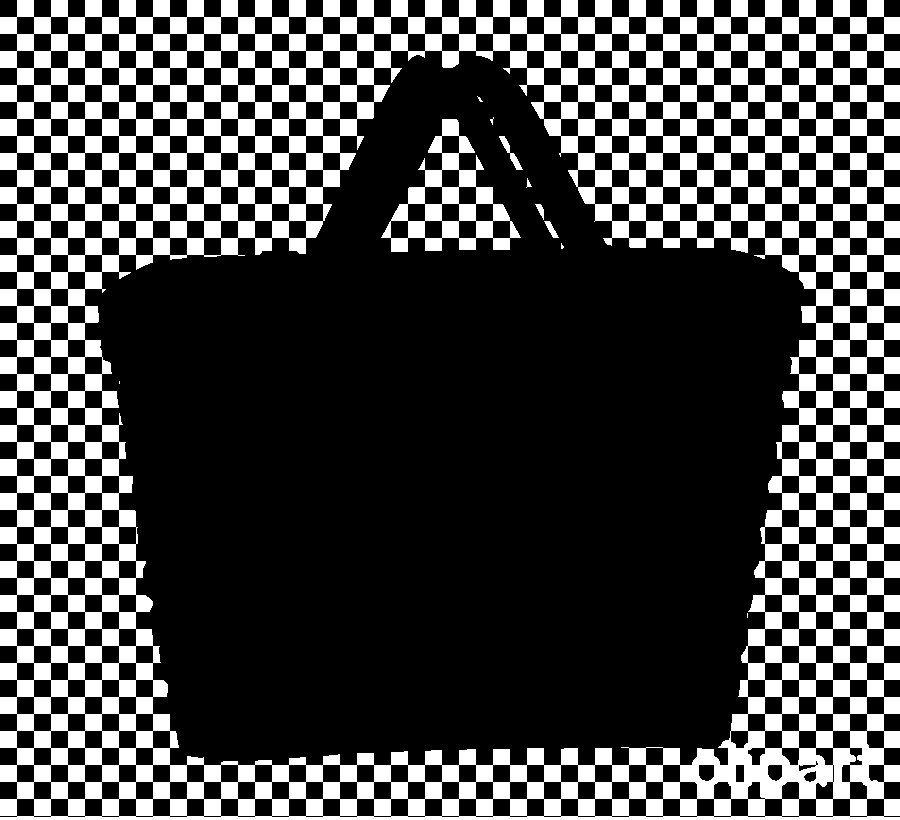

In [113]:
originalImage = cv2.imread('totebag.png')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

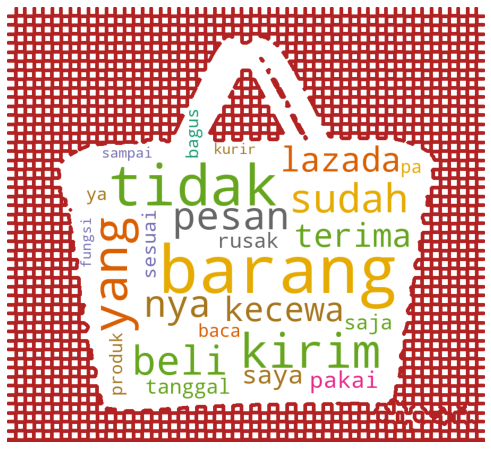

In [114]:
# WordCloud Label Review bintang 1

teks_1 = df[df.label == 1]
normal_string = []

for t in teks_1.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=125, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

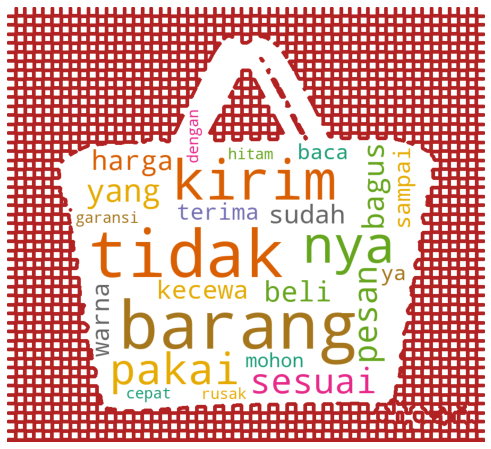

In [115]:
# WordCloud Label Review bintang 2

teks_2 = df[df.label == 2]
normal_string = []

for t in teks_2.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=125, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

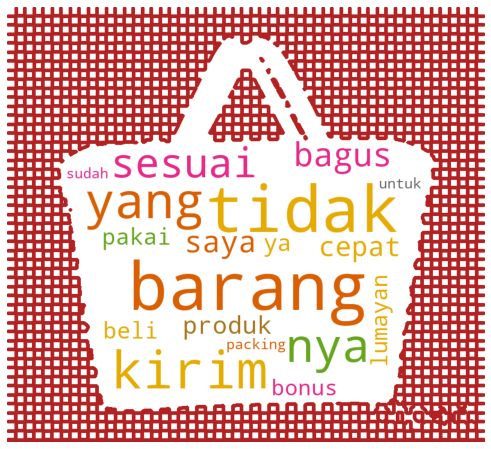

In [116]:
# WordCloud Label Review bintang 3

teks_3 = df[df.label == 3]
normal_string = []

for t in teks_3.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=125, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

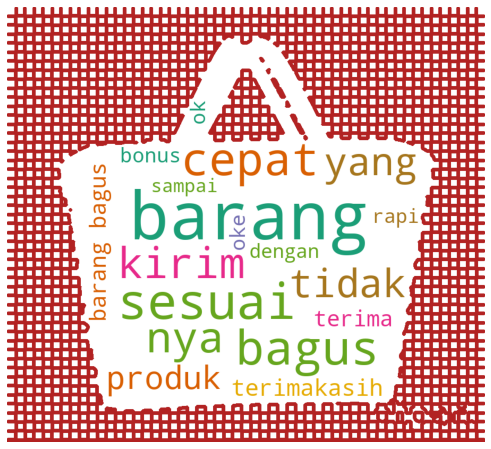

In [117]:
# WordCloud Label Review bintang 4

teks_4 = df[df.label == 4]
normal_string = []

for t in teks_4.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=125, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

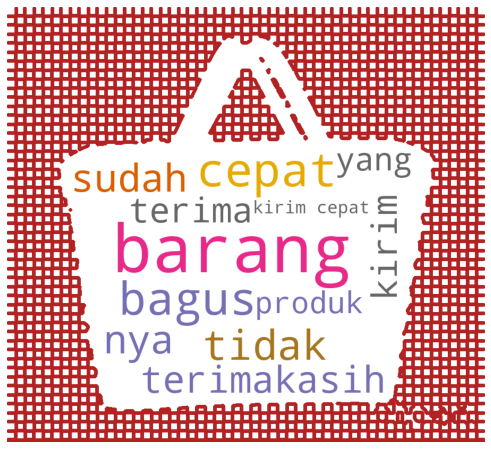

In [118]:
# WordCloud Label Review bintang 5

teks_5 = df[df.label == 5]
normal_string = []

for t in teks_5.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=125, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#Text Classification

Pada text classification ini kita akan menggunakan algoritma Machine learning khususnya: Naive Bayes dan Suport Vectoc Machine (SVM)

In [340]:
#Feature Extraction sebelumnya menggunakan TFIDF Unigram
#import library
from sklearn import svm #model support vector machine
from sklearn.naive_bayes import MultinomialNB #multinomial naive bayes
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.model_selection import train_test_split
import random

In [341]:
# tentukan X dan y
X = data_selected_feature
y = df.label

In [342]:
#train test split data
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state = 0)

In [343]:
print("Train: ", len(x_train))
print("Tes: ", len(x_test))

Train:  1093
Tes:  274


In [344]:
#Training Model

from datetime import datetime

start_time = datetime.now()

from joblib import dump
#algoritma fitting

#text_algorithm = MultinomialNB()
text_algorithm = KNeighborsClassifier(5)
#text_algorithm = svm.SVC(kernel="rbf", C=1.0)

model = text_algorithm.fit(x_train, y_train)

# save the model to disk
#dump(model, filename="model_sentiment_naive.joblib")
dump(model, filename="model_sentiment_KNN.joblib")
#dump(model, filename="model_sentiment_SVC.joblib")

end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)

Duration: 0:00:00.034802


In [345]:
#prediksi

prediksi = model.predict(x_test)

prediksi

array([3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 4, 3, 3, 1, 3, 3, 4, 4, 3, 3, 4,
       4, 4, 3, 3, 3, 4, 5, 3, 3, 3, 3, 1, 5, 3, 4, 3, 1, 1, 4, 5, 1, 4,
       3, 5, 3, 3, 3, 1, 4, 3, 3, 4, 4, 1, 1, 4, 4, 4, 1, 3, 3, 4, 4, 3,
       1, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 1, 1, 4, 3, 3, 4, 3, 4, 3, 4,
       3, 3, 2, 1, 1, 1, 4, 3, 4, 4, 4, 1, 1, 4, 3, 3, 1, 1, 5, 1, 4, 3,
       1, 4, 4, 3, 1, 4, 3, 3, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3, 3, 3, 4, 4,
       1, 4, 1, 4, 4, 3, 1, 1, 4, 3, 1, 4, 1, 4, 5, 3, 3, 4, 4, 1, 3, 3,
       1, 1, 3, 4, 4, 3, 4, 1, 3, 1, 3, 3, 4, 1, 4, 1, 3, 3, 3, 3, 4, 3,
       4, 4, 4, 1, 5, 4, 3, 3, 3, 4, 3, 1, 3, 5, 1, 1, 1, 4, 4, 1, 4, 4,
       5, 1, 4, 3, 1, 3, 3, 1, 1, 4, 3, 3, 4, 4, 1, 1, 3, 3, 3, 5, 3, 1,
       3, 3, 3, 4, 4, 3, 4, 4, 1, 3, 4, 3, 3, 4, 4, 1, 3, 1, 1, 3, 4, 1,
       3, 3, 3, 3, 1, 4, 3, 4, 1, 3, 4, 1, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4,
       4, 3, 1, 1, 1, 4, 1, 3, 3, 5])

In [346]:
#evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           1       0.39      0.42      0.40        57
           2       1.00      0.05      0.10        20
           3       0.27      0.42      0.33        72
           4       0.33      0.49      0.39        59
           5       0.45      0.08      0.13        66

    accuracy                           0.32       274
   macro avg       0.49      0.29      0.27       274
weighted avg       0.40      0.32      0.29       274



[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5')]

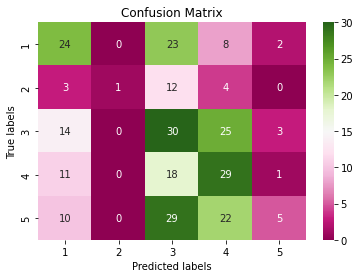

In [347]:
import seaborn as sns
ax= plt.subplot()

CM = confusion_matrix(y_test, prediksi)

sns.heatmap(CM, annot=True, cmap="PiYG",fmt='g', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5'])
ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5'])

In [348]:
#Menggunakan Cross Validation untuk memvalidasi data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv        = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
accuracy= (cross_val_score(model,X,y,cv=cv,scoring='accuracy'))
score_accuracy = np.mean(accuracy)
print ("accuracy: ",accuracy)
print ("accuracy: ",score_accuracy)

accuracy:  [0.31386861 0.32846715 0.24452555 0.33211679 0.31751825 0.32116788
 0.32116788 0.29927007 0.32481752 0.30656934]
accuracy:  0.310948905109489


In [353]:
from joblib import load
#Hasil
#pipeline = load("model_sentiment_naive.joblib")
#pipeline = load("model_sentiment_SVC.joblib")
pipeline = load("model_sentiment_KNN.joblib")

data_input = input("Masukkan sentiment:\n")
data_input = preprocessing(data_input)

#Load
tfidf = TfidfVectorizer

#loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(new_selected_features))
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("selected_feature_tf-idf.pkl", "rb"))))

hasil = pipeline.predict(loaded_vec.fit_transform([data_input]))

#print("Hasil Preprocessing:\n", proses)

if(hasil==1):
    s ="Buruk"
elif (hasil==2):
    s ="Tidak Bagus"
elif (hasil==3):
    s ="Lumayan Bagus"
elif (hasil==4):
    s ="Bagus"
else:
    s ="Sangat Bagus"
    
print("Hasil prediksi:\n", s)

Masukkan sentiment:
barangku hancur
Hasil prediksi:
 Buruk


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
